## Microinteractions
### Computational pipeline for fitting linear regression model for interaction coefficients inference.

The pre-release version of this pipeline assumes the data to be in a very specific format.
Please contact [alex@gavruskin.com](mailto:alex@gavruskin.com) if you wish to give it a try.

- Read the data and fit the model. `lm_devtime = ` linear model for dev. time from averages over 5 replicates;
`lm_fitness = ` linear model for fitness from averages over 5 replicates; 
`lm_3_reps = ` linear model for dev. time from 3 replicates (no averaging).
The last one is the most important.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import sys

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("png", "pdf", "svg")

matplotlib.style.use('ggplot')
%matplotlib inline


data = pd.read_csv("fitness_summary_all_replicates_parameters.csv", sep="\t")
data_3 = pd.read_csv("fitness_summary_3_replicates_parameters.csv", sep="\t")
data_6 = pd.read_csv("fitness_summary_6_replicates_parameters.csv", sep="\t")
lm_fecundity = smf.ols(formula="fecundity ~ a + a1 + a2 + a3 + a4 + a5 +"
                     "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                     "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                     "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data).fit() 
lm_fitness = smf.ols(formula="fitness ~ a + a1 + a2 + a3 + a4 + a5 +"
                     "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                     "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                     "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data).fit()
# This one only makes sence if the data includes raw measurements:
# lm_devtime = smf.ols(formula="development ~ a + a1 + a2 + a3 + a4 + a5 +"
#                      "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
#                      "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
#                      "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data).fit() 
lm_3_reps = smf.ols(formula="development ~ a + a1 + a2 + a3 + a4 + a5 +"
                     "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                     "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                     "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data_3).fit()
lm_6_reps = smf.ols(formula="development ~ a + a1 + a2 + a3 + a4 + a5 +"
                     "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                     "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                     "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data_6).fit()

- Output summary statistics, for both fecundity time and fitness:

In [2]:
lm_fecundity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              fecundity   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1.391
Date:                Wed, 03 May 2017   Prob (F-statistic):              0.105
Time:                        17:17:15   Log-Likelihood:                -804.77
No. Observations:                 158   AIC:                             1674.
Df Residuals:                     126   BIC:                             1772.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     52.2950     11.038      4.738      0.000        30.450    74.140
a             52.2950     11.038      4.738      0.000        30.450    74.140
a1           -28.0480     29.619     -0.947      0.345       -86.663    30.567
a2           -39.5625     31.221     -1.267      0.207      -101.349    22.224
a3            26.9820     29.619      0.911      0.364       -31.633    85.597
a4            48.6400     29.619      1.642      0.103        -9.975   107.255
a5            58.3880     29.619      1.971      0.051        -0.227   117.003
b12          -48.6965     41.888     -1.163      0.247      -131.591    34.198
b13          -46.5880     40.708     -1.144      0.255      -127.147    33.971
b14           -7.5680     40.708     -0.186      0.853       -88.127    72.991
b15          -20.5180     40.708     -0.504      0.615      -101.077    60.041
b23          -23.2125     41.888     -0.554      0.580      -106.107    59.682
b24           22.0675     41.888      0.527      0.599       -60.827   104.962
b25          -30.2665     41.888     -0.723      0.471      -113.161    52.628
b34           55.6320     40.708      1.367      0.174       -24.927   136.191
b35           57.9340     40.708      1.423      0.157       -22.625   138.493
b45           55.6420     40.708      1.367      0.174       -24.917   136.201
c123         -70.8945     57.569     -1.231      0.220      -184.822    43.033
c124          24.9875     57.569      0.434      0.665       -88.940   138.915
c125         -66.5805     57.569     -1.157      0.250      -180.508    47.347
c134          -5.8480     56.716     -0.103      0.918      -118.088   106.392
c135         -59.4800     56.716     -1.049      0.296      -171.720    52.760
c145         -10.3300     56.716     -0.182      0.856      -122.570   101.910
c234          45.2075     57.569      0.785      0.434       -68.720   159.135
c235         -17.0485     57.569     -0.296      0.768      -130.976    96.879
c245          19.1575     57.569      0.333      0.740       -94.770   133.085
c345          63.9320     56.716      1.127      0.262       -48.308   176.172
d1234         28.6715     80.209      0.357      0.721      -130.060   187.403
d1235       -101.8565     80.209     -1.270      0.206      -260.588    56.875
d1245          6.7175     80.209      0.084      0.933      -152.014   165.449
d1345        -52.7520     79.599     -0.663      0.509      -210.276   104.772
d2345         40.5435     80.209      0.505      0.614      -118.188   199.275
e12345       -37.0525    112.570     -0.329      0.743      -259.826   185.721
==============================================================================
Omnibus:                        4.899   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.488
Sk

In [3]:
lm_fitness.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                fitness   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2.209
Date:                Wed, 03 May 2017   Prob (F-statistic):            0.00114
Time:                        17:17:15   Log-Likelihood:                 401.79
No. Observations:                 158   AIC:                            -739.6
Df Residuals:                     126   BIC:                            -641.6
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6039      0.005    113.375      0.000         0.593     0.614
a              0.6039      0.005    113.375      0.000         0.593     0.614
a1            -0.0362      0.014     -2.534      0.013        -0.064    -0.008
a2            -0.0362      0.015     -2.405      0.018        -0.066    -0.006
a3            -0.0031      0.014     -0.219      0.827        -0.031     0.025
a4            -0.0015      0.014     -0.103      0.918        -0.030     0.027
a5             0.0076      0.014      0.530      0.597        -0.021     0.036
b12           -0.0485      0.020     -2.397      0.018        -0.088    -0.008
b13           -0.0364      0.020     -1.853      0.066        -0.075     0.002
b14           -0.0227      0.020     -1.158      0.249        -0.062     0.016
b15           -0.0430      0.020     -2.187      0.031        -0.082    -0.004
b23           -0.0419      0.020     -2.073      0.040        -0.082    -0.002
b24           -0.0236      0.020     -1.168      0.245        -0.064     0.016
b25           -0.0516      0.020     -2.553      0.012        -0.092    -0.012
b34           -0.0150      0.020     -0.764      0.446        -0.054     0.024
b35            0.0018      0.020      0.089      0.929        -0.037     0.041
b45            0.0026      0.020      0.133      0.895        -0.036     0.041
c123          -0.0418      0.028     -1.504      0.135        -0.097     0.013
c124          -0.0225      0.028     -0.811      0.419        -0.078     0.032
c125          -0.0764      0.028     -2.749      0.007        -0.131    -0.021
c134          -0.0330      0.027     -1.205      0.230        -0.087     0.021
c135          -0.0396      0.027     -1.446      0.151        -0.094     0.015
c145          -0.0187      0.027     -0.683      0.496        -0.073     0.035
c234          -0.0273      0.028     -0.982      0.328        -0.082     0.028
c235          -0.0374      0.028     -1.347      0.180        -0.092     0.018
c245          -0.0347      0.028     -1.250      0.213        -0.090     0.020
c345          -0.0049      0.027     -0.179      0.858        -0.059     0.049
d1234         -0.0261      0.039     -0.675      0.501        -0.103     0.050
d1235         -0.0617      0.039     -1.593      0.114        -0.138     0.015
d1245         -0.0499      0.039     -1.289      0.200        -0.127     0.027
d1345         -0.0298      0.038     -0.775      0.440        -0.106     0.046
d2345         -0.0168      0.039     -0.434      0.665        -0.093     0.060
e12345        -0.0509      0.054     -0.936      0.351        -0.158     0.057
==============================================================================
Omnibus:                       18.480   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.112
Sk

In [4]:
lm_3_reps.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            development   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     4.413
Date:                Wed, 03 May 2017   Prob (F-statistic):           2.64e-07
Time:                        17:17:15   Log-Likelihood:                -39.000
No. Observations:                  96   AIC:                             142.0
Df Residuals:                      64   BIC:                             224.1
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.0000      0.128     38.933      0.000         4.743     5.257
a              5.0000      0.128     38.933      0.000         4.743     5.257
a1             1.0000      0.363      2.753      0.008         0.274     1.726
a2             1.0000      0.363      2.753      0.008         0.274     1.726
a3             0.6667      0.363      1.835      0.071        -0.059     1.392
a4             0.6667      0.363      1.835      0.071        -0.059     1.392
a5             0.3333      0.363      0.918      0.362        -0.392     1.059
b12            1.0000      0.514      1.947      0.056        -0.026     2.026
b13            1.0000      0.514      1.947      0.056        -0.026     2.026
b14            0.6667      0.514      1.298      0.199        -0.360     1.693
b15            1.3333      0.514      2.596      0.012         0.307     2.360
b23            2.0000      0.514      3.893      0.000         0.974     3.026
b24            1.6667      0.514      3.244      0.002         0.640     2.693
b25            2.3333      0.514      4.542      0.000         1.307     3.360
b34            1.3333      0.514      2.596      0.012         0.307     2.360
b35            0.6667      0.514      1.298      0.199        -0.360     1.693
b45            1.0000      0.514      1.947      0.056        -0.026     2.026
c123           1.6667      0.726      2.294      0.025         0.215     3.118
c124           1.3333      0.726      1.835      0.071        -0.118     2.785
c125           2.3333      0.726      3.212      0.002         0.882     3.785
c134           1.3333      0.726      1.835      0.071        -0.118     2.785
c135           1.0000      0.726      1.376      0.173        -0.451     2.451
c145           0.6667      0.726      0.918      0.362        -0.785     2.118
c234           2.3333      0.726      3.212      0.002         0.882     3.785
c235           2.3333      0.726      3.212      0.002         0.882     3.785
c245           3.0000      0.726      4.129      0.000         1.549     4.451
c345           1.3333      0.726      1.835      0.071        -0.118     2.785
d1234          2.3333      1.027      2.271      0.027         0.281     4.386
d1235          2.6667      1.027      2.596      0.012         0.614     4.719
d1245          3.0000      1.027      2.920      0.005         0.948     5.052
d1345          1.3333      1.027      1.298      0.199        -0.719     3.386
d2345          3.0000      1.027      2.920      0.005         0.948     5.052
e12345         4.3333      1.453      2.982      0.004         1.431     7.236
==============================================================================
Omnibus:                        1.569   Durbin-Watson:                   2.895
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.017
Sk

In [5]:
lm_6_reps.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            development   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2.474
Date:                Wed, 03 May 2017   Prob (F-statistic):           0.000137
Time:                        17:17:15   Log-Likelihood:                -122.65
No. Observations:                 192   AIC:                             309.3
Df Residuals:                     160   BIC:                             413.5
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.0000      0.102     48.787      0.000         4.798     5.202
a              5.0000      0.102     48.787      0.000         4.798     5.202
a1             0.5000      0.290      1.725      0.086        -0.072     1.072
a2             0.5000      0.290      1.725      0.086        -0.072     1.072
a3             0.3333      0.290      1.150      0.252        -0.239     0.906
a4             0.3333      0.290      1.150      0.252        -0.239     0.906
a5             0.1667      0.290      0.575      0.566        -0.406     0.739
b12            0.5000      0.410      1.220      0.224        -0.310     1.310
b13            0.6667      0.410      1.626      0.106        -0.143     1.476
b14            0.5000      0.410      1.220      0.224        -0.310     1.310
b15            0.6667      0.410      1.626      0.106        -0.143     1.476
b23            1.1667      0.410      2.846      0.005         0.357     1.976
b24            1.0000      0.410      2.439      0.016         0.190     1.810
b25            1.3333      0.410      3.252      0.001         0.524     2.143
b34            0.8333      0.410      2.033      0.044         0.024     1.643
b35            0.5000      0.410      1.220      0.224        -0.310     1.310
b45            0.6667      0.410      1.626      0.106        -0.143     1.476
c123           1.0000      0.580      1.725      0.086        -0.145     2.145
c124           0.6667      0.580      1.150      0.252        -0.478     1.812
c125           1.3333      0.580      2.300      0.023         0.188     2.478
c134           1.1667      0.580      2.012      0.046         0.022     2.312
c135           0.6667      0.580      1.150      0.252        -0.478     1.812
c145           0.5000      0.580      0.862      0.390        -0.645     1.645
c234           1.6667      0.580      2.875      0.005         0.522     2.812
c235           1.1667      0.580      2.012      0.046         0.022     2.312
c245           2.0000      0.580      3.450      0.001         0.855     3.145
c345           1.1667      0.580      2.012      0.046         0.022     2.312
d1234          1.6667      0.820      2.033      0.044         0.047     3.286
d1235          1.3333      0.820      1.626      0.106        -0.286     2.953
d1245          1.6667      0.820      2.033      0.044         0.047     3.286
d1345          1.1667      0.820      1.423      0.157        -0.453     2.786
d2345          2.1667      0.820      2.643      0.009         0.547     3.786
e12345         2.6667      1.160      2.300      0.023         0.377     4.957
==============================================================================
Omnibus:                        1.720   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.435
Sk

- Plot inferred coefficients with confidence intervals starting with 6 replicates and dev. time:

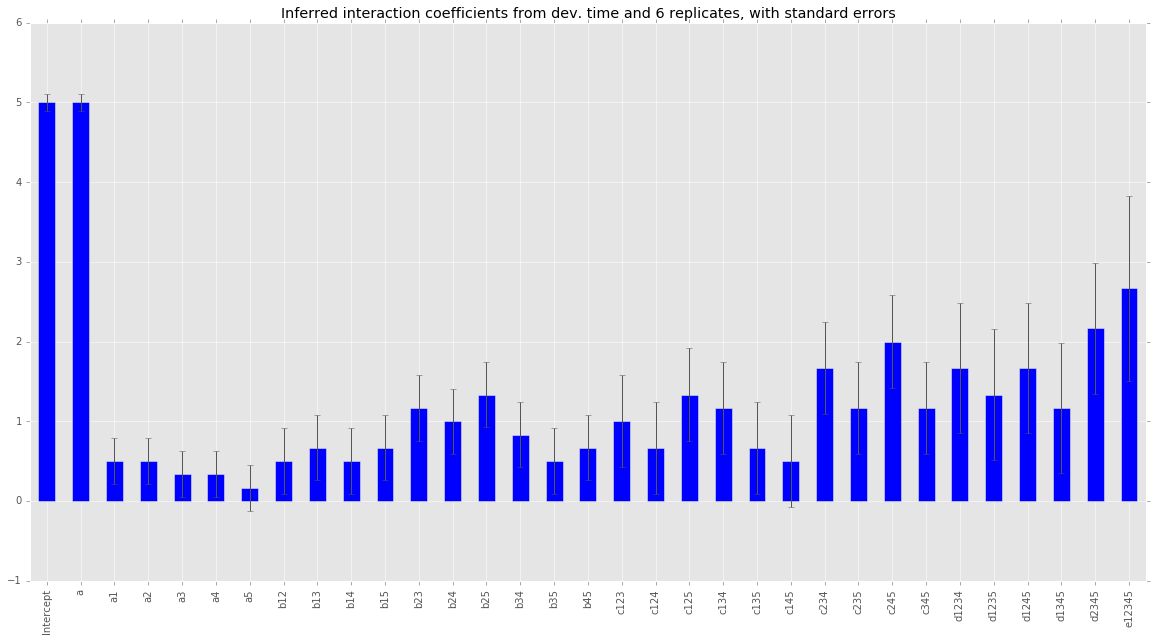

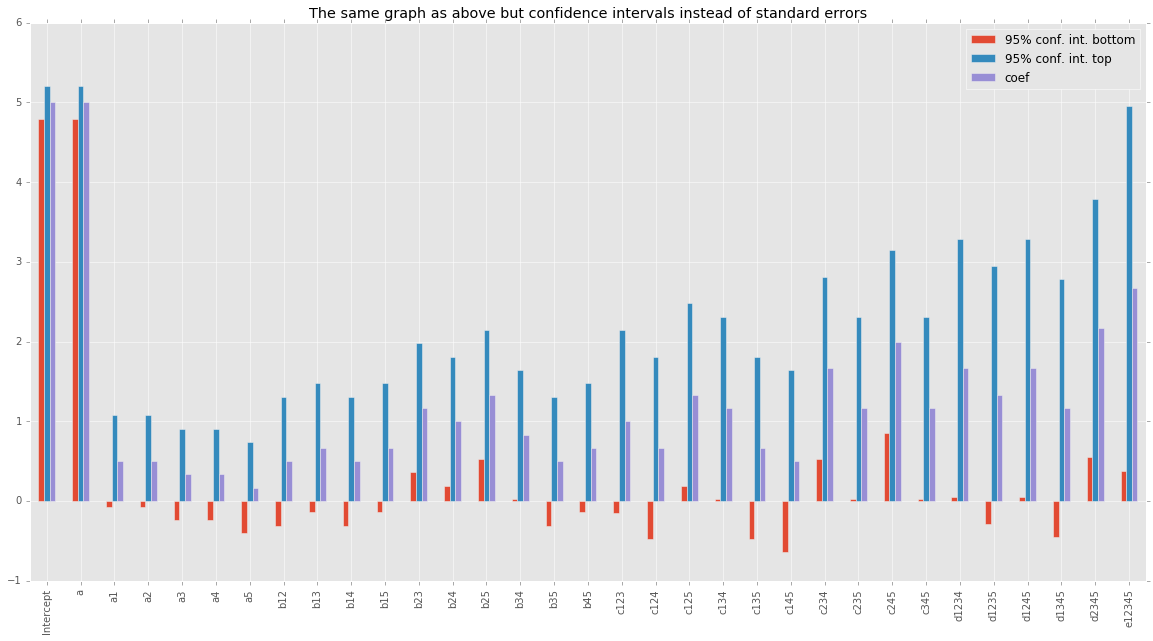

In [6]:
conf_int_devtime_6_reps = pd.DataFrame(lm_6_reps.conf_int())
conf_int_devtime_6_reps[2] = [lm_6_reps.params.a,
                              lm_6_reps.params.a,
                              lm_6_reps.params.a1,
                              lm_6_reps.params.a2,
                              lm_6_reps.params.a3,
                              lm_6_reps.params.a4,
                              lm_6_reps.params.a5,
                              lm_6_reps.params.b12,
                              lm_6_reps.params.b13,
                              lm_6_reps.params.b14,
                              lm_6_reps.params.b15,
                              lm_6_reps.params.b23,
                              lm_6_reps.params.b24,
                              lm_6_reps.params.b25,
                              lm_6_reps.params.b34,
                              lm_6_reps.params.b35,
                              lm_6_reps.params.b45,
                              lm_6_reps.params.c123,
                              lm_6_reps.params.c124,
                              lm_6_reps.params.c125,
                              lm_6_reps.params.c134,
                              lm_6_reps.params.c135,
                              lm_6_reps.params.c145,
                              lm_6_reps.params.c234,
                              lm_6_reps.params.c235,
                              lm_6_reps.params.c245,
                              lm_6_reps.params.c345,
                              lm_6_reps.params.d1234,
                              lm_6_reps.params.d1235,
                              lm_6_reps.params.d1245,
                              lm_6_reps.params.d1345,
                              lm_6_reps.params.d2345,
                              lm_6_reps.params.e12345]
conf_int_devtime_6_reps.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
# conf_int_devtime_6_reps = abs(conf_int_devtime_6_reps)
conf_int_devtime_6_reps["coef"].plot.bar(yerr=lm_6_reps.bse, figsize=(20,10), color="b",
                                  title="Inferred interaction coefficients from dev. time and 6 replicates, "
                                         "with standard errors")
plt.savefig("6_reps_dev_time_std_err_as_range.pdf")
conf_int_devtime_6_reps.plot.bar(figsize=(20,10), title="The same graph as above but confidence intervals "
                                 "instead of standard errors")
plt.savefig("6_reps_dev_time_conf_int_as_bars.pdf")


- Jitter the 6 replicate dev. time data to add more variance:

In [7]:
data_jitter_6 = data_6.copy()
data_jitter_6.development = data_jitter_6.development.astype(float)
for index, row in data_jitter_6.iterrows():
    if 8.9 < row["development"] and row["development"] < 9.1:
        data_jitter_6.set_value(index, "development", np.random.uniform(26/3, 9))
    elif 9.3 < row["development"] < 9.4:
        data_jitter_6.set_value(index, "development", np.random.uniform(9, 28/3))
    elif 9.6 < row["development"] < 9.7:
        data_jitter_6.set_value(index, "development", np.random.uniform(28/3, 29/3))
    elif 9.9 < row["development"] < 10.1:
        data_jitter_6.set_value(index, "development", np.random.uniform(29/3, 10))
    elif 10.3 < row["development"] < 10.4:
        data_jitter_6.set_value(index, "development", np.random.uniform(10, 31/3))
    elif 10.6 < row["development"] < 10.7:
        data_jitter_6.set_value(index, "development", np.random.uniform(31/3, 32/3))
    elif 10.9 < row["development"] < 11.1:
        data_jitter_6.set_value(index, "development", np.random.uniform(32/3, 11))
    else:
        print("Some data doesn't fit sampling intervals! Quitting.")
        sys.exit()

- Fit the model and plot the results for jittered data:

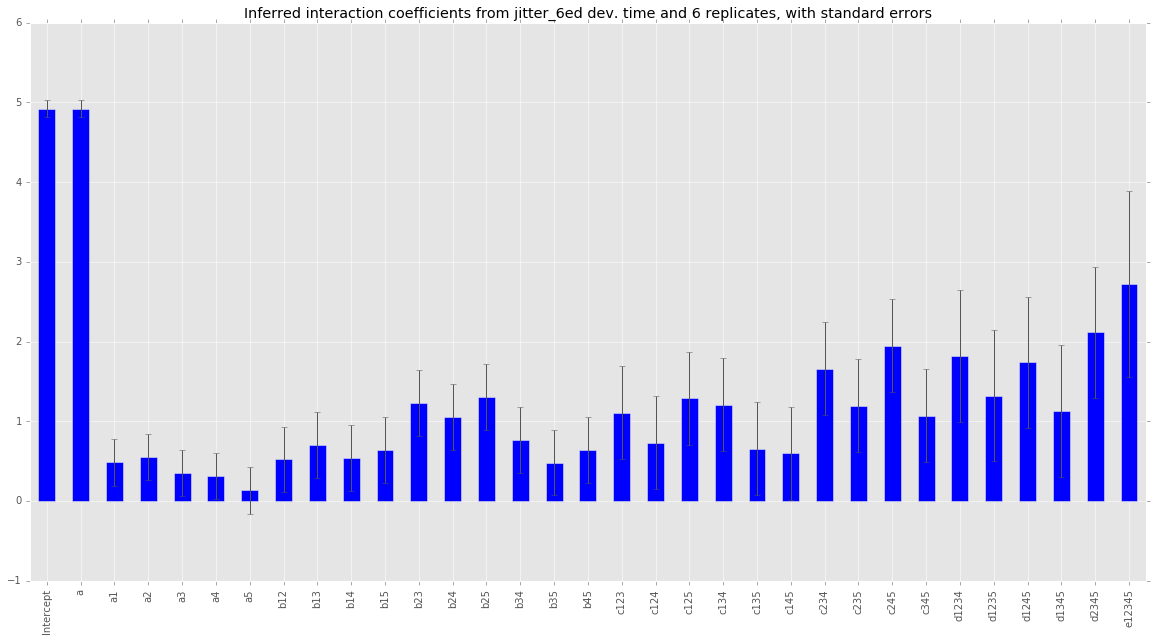

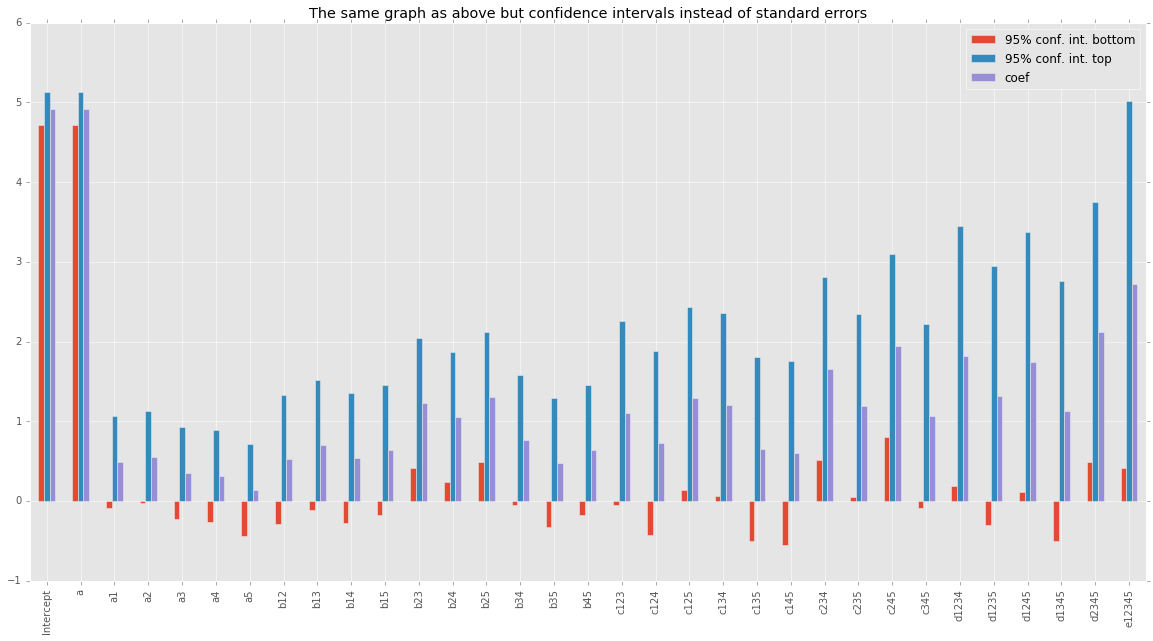

In [8]:
lm_devtime_jitter_6 = smf.ols(formula="development ~ a + a1 + a2 + a3 + a4 + a5 +"
                            "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                            "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                            "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data_jitter_6).fit()
conf_int_devtime_jitter_6 = pd.DataFrame(lm_devtime_jitter_6.conf_int())
conf_int_devtime_jitter_6[2] = [lm_devtime_jitter_6.params.a,
                              lm_devtime_jitter_6.params.a,
                              lm_devtime_jitter_6.params.a1,
                              lm_devtime_jitter_6.params.a2,
                              lm_devtime_jitter_6.params.a3,
                              lm_devtime_jitter_6.params.a4,
                              lm_devtime_jitter_6.params.a5,
                              lm_devtime_jitter_6.params.b12,
                              lm_devtime_jitter_6.params.b13,
                              lm_devtime_jitter_6.params.b14,
                              lm_devtime_jitter_6.params.b15,
                              lm_devtime_jitter_6.params.b23,
                              lm_devtime_jitter_6.params.b24,
                              lm_devtime_jitter_6.params.b25,
                              lm_devtime_jitter_6.params.b34,
                              lm_devtime_jitter_6.params.b35,
                              lm_devtime_jitter_6.params.b45,
                              lm_devtime_jitter_6.params.c123,
                              lm_devtime_jitter_6.params.c124,
                              lm_devtime_jitter_6.params.c125,
                              lm_devtime_jitter_6.params.c134,
                              lm_devtime_jitter_6.params.c135,
                              lm_devtime_jitter_6.params.c145,
                              lm_devtime_jitter_6.params.c234,
                              lm_devtime_jitter_6.params.c235,
                              lm_devtime_jitter_6.params.c245,
                              lm_devtime_jitter_6.params.c345,
                              lm_devtime_jitter_6.params.d1234,
                              lm_devtime_jitter_6.params.d1235,
                              lm_devtime_jitter_6.params.d1245,
                              lm_devtime_jitter_6.params.d1345,
                              lm_devtime_jitter_6.params.d2345,
                              lm_devtime_jitter_6.params.e12345]
conf_int_devtime_jitter_6.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
conf_int_devtime_jitter_6["coef"].plot.bar(yerr=lm_devtime_jitter_6.bse, figsize=(20,10), color="b",
                                         title="Inferred interaction coefficients from jitter_6ed dev. time "
                                                "and 6 replicates, with standard errors")
plt.savefig("dev_time_jitter_6_std_err_as_range.pdf")
conf_int_devtime_jitter_6.plot.bar(figsize=(20,10), title="The same graph as above but confidence intervals "
                                 "instead of standard errors")
plt.savefig("dev_time_jitter_6_conf_int_as_bars.pdf")

- Plot inferred coefficients with confidence intervals starting with 3 replicates and dev. time:

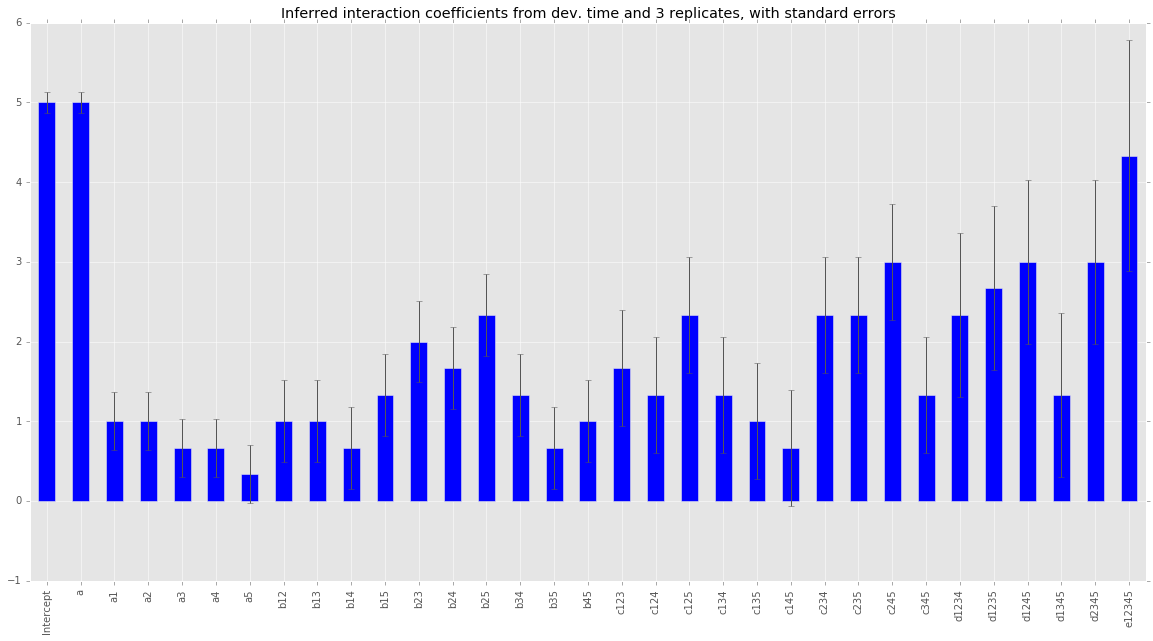

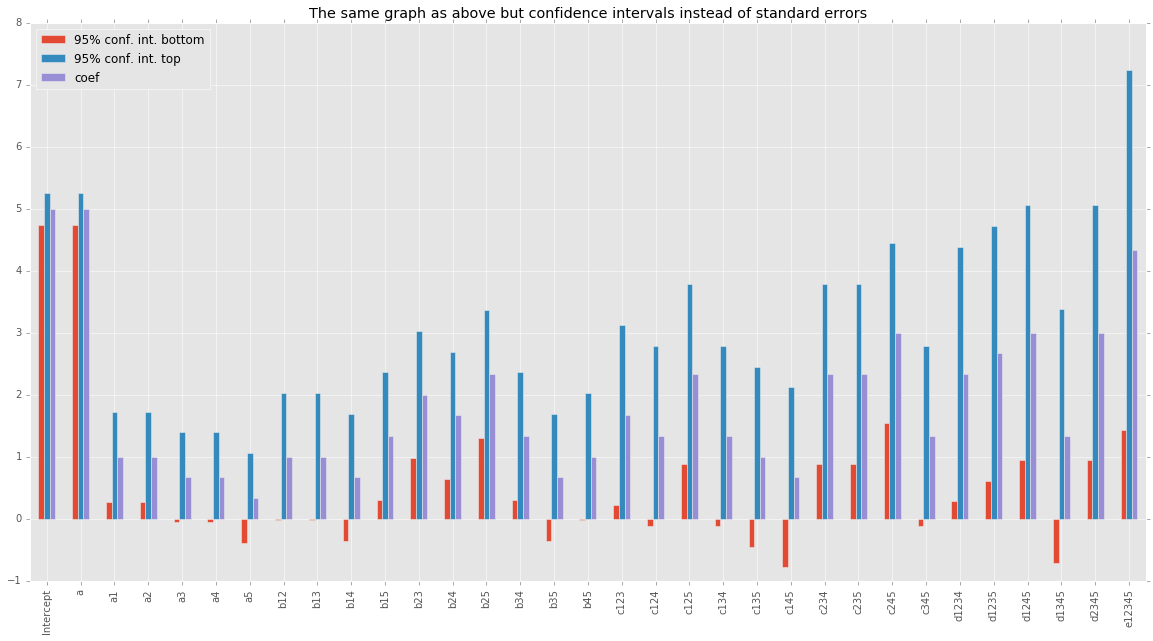

In [9]:
conf_int_devtime_3_reps = pd.DataFrame(lm_3_reps.conf_int())
conf_int_devtime_3_reps[2] = [lm_3_reps.params.a,
                              lm_3_reps.params.a,
                              lm_3_reps.params.a1,
                              lm_3_reps.params.a2,
                              lm_3_reps.params.a3,
                              lm_3_reps.params.a4,
                              lm_3_reps.params.a5,
                              lm_3_reps.params.b12,
                              lm_3_reps.params.b13,
                              lm_3_reps.params.b14,
                              lm_3_reps.params.b15,
                              lm_3_reps.params.b23,
                              lm_3_reps.params.b24,
                              lm_3_reps.params.b25,
                              lm_3_reps.params.b34,
                              lm_3_reps.params.b35,
                              lm_3_reps.params.b45,
                              lm_3_reps.params.c123,
                              lm_3_reps.params.c124,
                              lm_3_reps.params.c125,
                              lm_3_reps.params.c134,
                              lm_3_reps.params.c135,
                              lm_3_reps.params.c145,
                              lm_3_reps.params.c234,
                              lm_3_reps.params.c235,
                              lm_3_reps.params.c245,
                              lm_3_reps.params.c345,
                              lm_3_reps.params.d1234,
                              lm_3_reps.params.d1235,
                              lm_3_reps.params.d1245,
                              lm_3_reps.params.d1345,
                              lm_3_reps.params.d2345,
                              lm_3_reps.params.e12345]
conf_int_devtime_3_reps.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
# conf_int_devtime_3_reps = abs(conf_int_devtime_3_reps)
conf_int_devtime_3_reps["coef"].plot.bar(yerr=lm_3_reps.bse, figsize=(20,10), color="b",
                                  title="Inferred interaction coefficients from dev. time and 3 replicates, "
                                         "with standard errors")
plt.savefig("3_reps_dev_time_std_err_as_range.pdf")
conf_int_devtime_3_reps.plot.bar(figsize=(20,10), title="The same graph as above but confidence intervals "
                                 "instead of standard errors")
plt.savefig("3_reps_dev_time_conf_int_as_bars.pdf")

- Jitter the 3 replicate dev. time data to add more variance:

In [10]:
data_jitter = data_3.copy()
data_jitter.development = data_jitter.development.astype(float)
for index, row in data_jitter.iterrows():
    if 8.9 < row["development"] and row["development"] < 9.1:
        data_jitter.set_value(index, "development", np.random.uniform(26/3, 9))
    elif 9.3 < row["development"] < 9.4:
        data_jitter.set_value(index, "development", np.random.uniform(9, 28/3))
    elif 9.6 < row["development"] < 9.7:
        data_jitter.set_value(index, "development", np.random.uniform(28/3, 29/3))
    elif 9.9 < row["development"] < 10.1:
        data_jitter.set_value(index, "development", np.random.uniform(29/3, 10))
    elif 10.3 < row["development"] < 10.4:
        data_jitter.set_value(index, "development", np.random.uniform(10, 31/3))
    elif 10.6 < row["development"] < 10.7:
        data_jitter.set_value(index, "development", np.random.uniform(31/3, 32/3))
    elif 10.9 < row["development"] < 11.1:
        data_jitter.set_value(index, "development", np.random.uniform(32/3, 11))
    else:
        print("Some data doesn't fit sampling intervals! Quitting.")
        sys.exit()

- Duplicate the data `n` times and then jitter the result:

In [11]:
n = 5
data_jitter_60 = data_3.copy()
data_jitter_6 = data_3.copy()
data_jitter_6.development = data_jitter_6.development.astype(float)
data_jitter_60.development = data_jitter_60.development.astype(float)
for i in range(n):
    data_jitter_60 = data_jitter_60.append(data_jitter_6)
for index, row in data_jitter_60.iterrows():
    if 8.9 < row["development"] and row["development"] < 9.1:
        data_jitter_60.set_value(index, "development", np.random.uniform(26/3, 9)) 
    elif 9.3 < row["development"] < 9.4:
        data_jitter_60.set_value(index, "development", np.random.uniform(9, 28/3))
    elif 9.6 < row["development"] < 9.7:
        data_jitter_60.set_value(index, "development", np.random.uniform(28/3, 29/3))
    elif 9.9 < row["development"] < 10.1:
        data_jitter_60.set_value(index, "development", np.random.uniform(29/3, 10))
    elif 10.3 < row["development"] < 10.4:
        data_jitter_60.set_value(index, "development", np.random.uniform(10, 31/3))
    elif 10.6 < row["development"] < 10.7:
        data_jitter_60.set_value(index, "development", np.random.uniform(31/3, 32/3))
    elif 10.9 < row["development"] < 11.1:
        data_jitter_60.set_value(index, "development", np.random.uniform(32/3, 11))
    else:
        print("Some data doesn't fit sampling intervals! Quitting.")
        sys.exit()

- Fit the model and plot the results for jittered data:

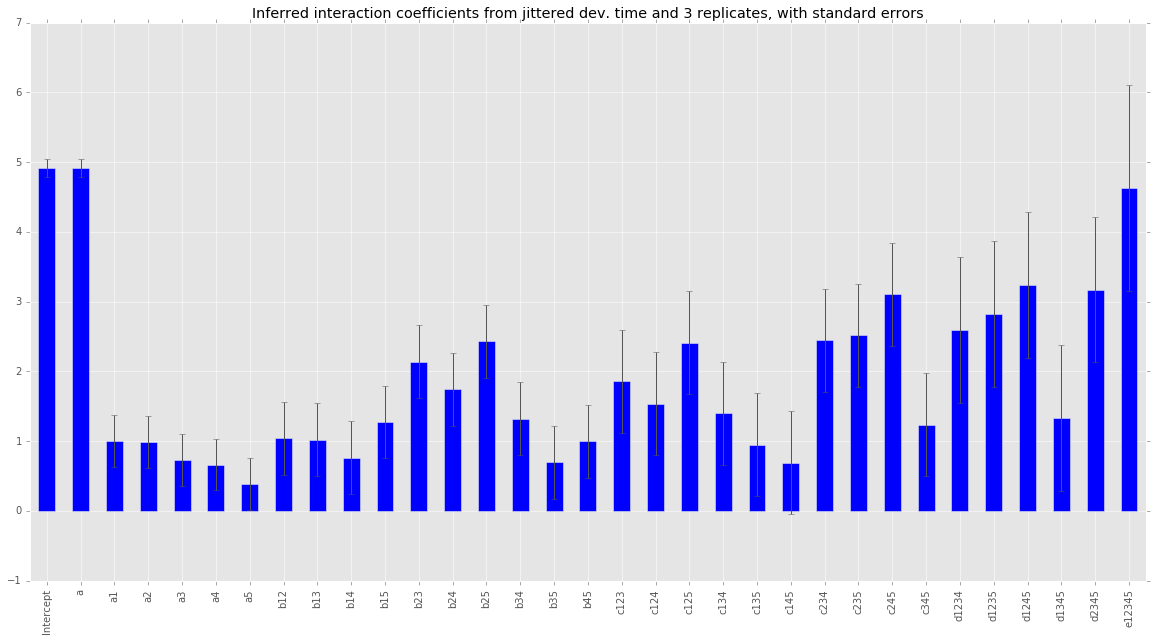

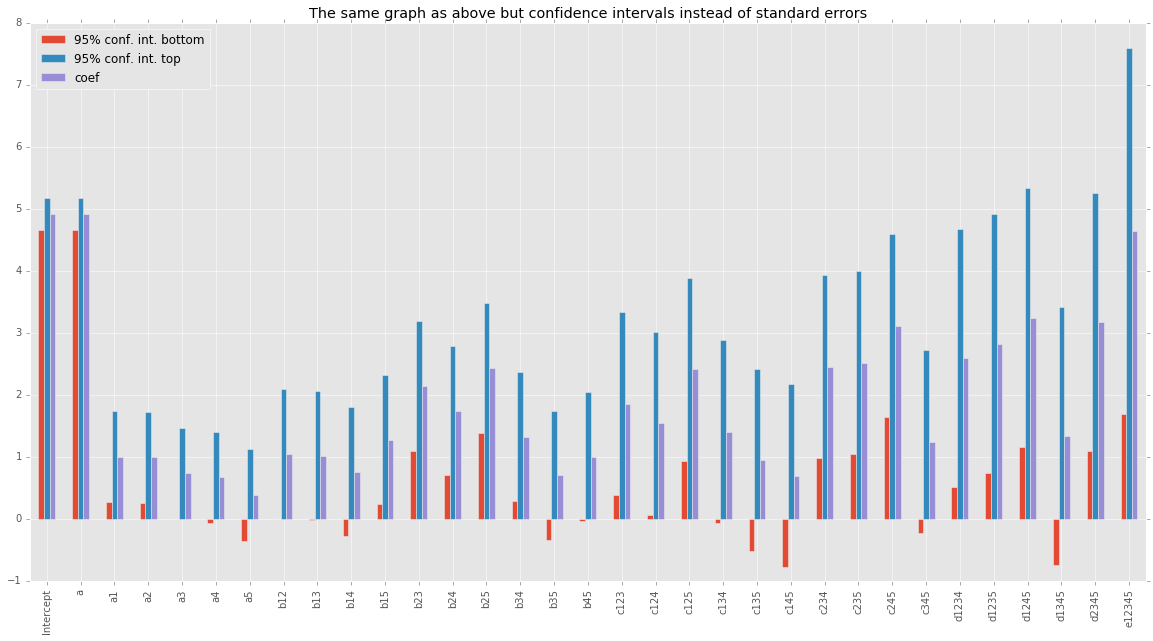

In [12]:
lm_devtime_jitter = smf.ols(formula="development ~ a + a1 + a2 + a3 + a4 + a5 +"
                            "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                            "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                            "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data_jitter).fit()
conf_int_devtime_jitter = pd.DataFrame(lm_devtime_jitter.conf_int())
conf_int_devtime_jitter[2] = [lm_devtime_jitter.params.a,
                              lm_devtime_jitter.params.a,
                              lm_devtime_jitter.params.a1,
                              lm_devtime_jitter.params.a2,
                              lm_devtime_jitter.params.a3,
                              lm_devtime_jitter.params.a4,
                              lm_devtime_jitter.params.a5,
                              lm_devtime_jitter.params.b12,
                              lm_devtime_jitter.params.b13,
                              lm_devtime_jitter.params.b14,
                              lm_devtime_jitter.params.b15,
                              lm_devtime_jitter.params.b23,
                              lm_devtime_jitter.params.b24,
                              lm_devtime_jitter.params.b25,
                              lm_devtime_jitter.params.b34,
                              lm_devtime_jitter.params.b35,
                              lm_devtime_jitter.params.b45,
                              lm_devtime_jitter.params.c123,
                              lm_devtime_jitter.params.c124,
                              lm_devtime_jitter.params.c125,
                              lm_devtime_jitter.params.c134,
                              lm_devtime_jitter.params.c135,
                              lm_devtime_jitter.params.c145,
                              lm_devtime_jitter.params.c234,
                              lm_devtime_jitter.params.c235,
                              lm_devtime_jitter.params.c245,
                              lm_devtime_jitter.params.c345,
                              lm_devtime_jitter.params.d1234,
                              lm_devtime_jitter.params.d1235,
                              lm_devtime_jitter.params.d1245,
                              lm_devtime_jitter.params.d1345,
                              lm_devtime_jitter.params.d2345,
                              lm_devtime_jitter.params.e12345]
conf_int_devtime_jitter.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
conf_int_devtime_jitter["coef"].plot.bar(yerr=lm_devtime_jitter.bse, figsize=(20,10), color="b",
                                         title="Inferred interaction coefficients from jittered dev. time "
                                                "and 3 replicates, with standard errors")
plt.savefig("dev_time_jitter_std_err_as_range.pdf")
conf_int_devtime_jitter.plot.bar(figsize=(20,10), title="The same graph as above but confidence intervals "
                                 "instead of standard errors")
plt.savefig("dev_time_jitter_conf_int_as_bars.pdf")

- Output summary stats for jittered data:

In [13]:
lm_devtime_jitter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            development   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     4.360
Date:                Wed, 03 May 2017   Prob (F-statistic):           3.24e-07
Time:                        17:17:23   Log-Likelihood:                -40.558
No. Observations:                  96   AIC:                             145.1
Df Residuals:                      64   BIC:                             227.2
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.9183      0.131     37.680      0.000         4.658     5.179
a              4.9183      0.131     37.680      0.000         4.658     5.179
a1             1.0018      0.369      2.713      0.009         0.264     1.739
a2             0.9887      0.369      2.678      0.009         0.251     1.726
a3             0.7326      0.369      1.984      0.052        -0.005     1.470
a4             0.6654      0.369      1.802      0.076        -0.072     1.403
a5             0.3848      0.369      1.042      0.301        -0.353     1.122
b12            1.0412      0.522      1.994      0.050        -0.002     2.084
b13            1.0188      0.522      1.951      0.055        -0.024     2.062
b14            0.7601      0.522      1.456      0.150        -0.283     1.803
b15            1.2738      0.522      2.440      0.017         0.231     2.317
b23            2.1413      0.522      4.101      0.000         1.098     3.184
b24            1.7410      0.522      3.335      0.001         0.698     2.784
b25            2.4309      0.522      4.656      0.000         1.388     3.474
b34            1.3240      0.522      2.536      0.014         0.281     2.367
b35            0.6990      0.522      1.339      0.185        -0.344     1.742
b45            1.0001      0.522      1.915      0.060        -0.043     2.043
c123           1.8570      0.738      2.515      0.014         0.382     3.332
c124           1.5369      0.738      2.081      0.041         0.062     3.012
c125           2.4093      0.738      3.263      0.002         0.934     3.884
c134           1.4016      0.738      1.898      0.062        -0.074     2.877
c135           0.9458      0.738      1.281      0.205        -0.529     2.421
c145           0.6935      0.738      0.939      0.351        -0.782     2.169
c234           2.4474      0.738      3.315      0.002         0.972     3.922
c235           2.5177      0.738      3.410      0.001         1.043     3.993
c245           3.1091      0.738      4.211      0.000         1.634     4.584
c345           1.2383      0.738      1.677      0.098        -0.237     2.713
d1234          2.5905      1.044      2.481      0.016         0.504     4.677
d1235          2.8211      1.044      2.702      0.009         0.735     4.907
d1245          3.2410      1.044      3.104      0.003         1.155     5.327
d1345          1.3338      1.044      1.277      0.206        -0.752     3.420
d2345          3.1729      1.044      3.039      0.003         1.087     5.259
e12345         4.6344      1.477      3.138      0.003         1.684     7.585
==============================================================================
Omnibus:                        1.928   Durbin-Watson:                   2.881
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.463
Sk

- Fit the model and plot the results for duplicated and jittered data:

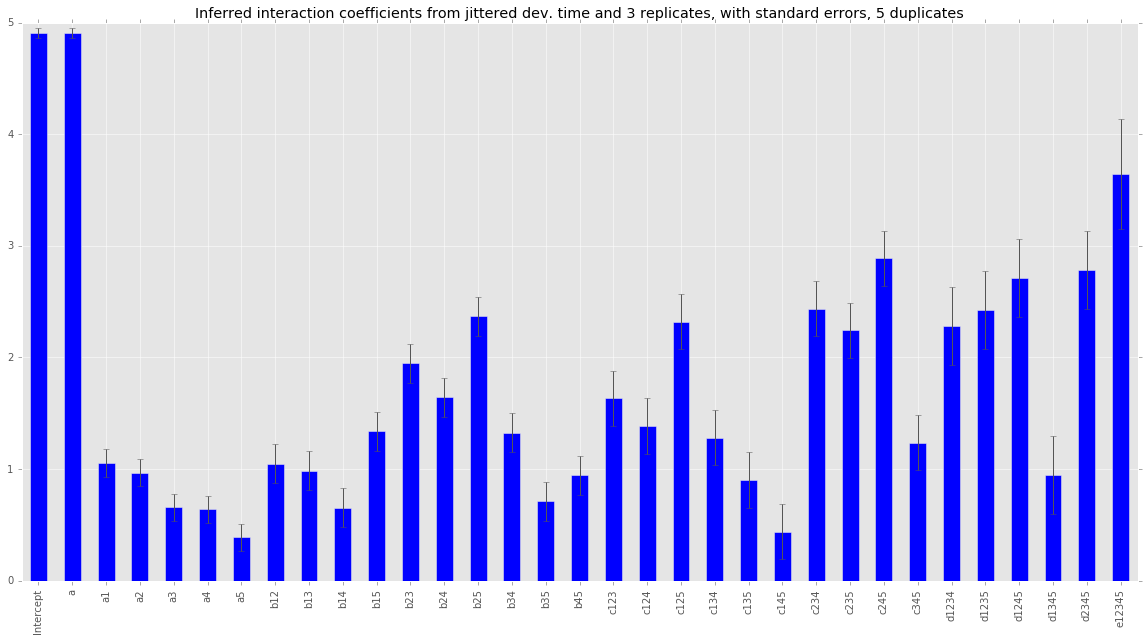

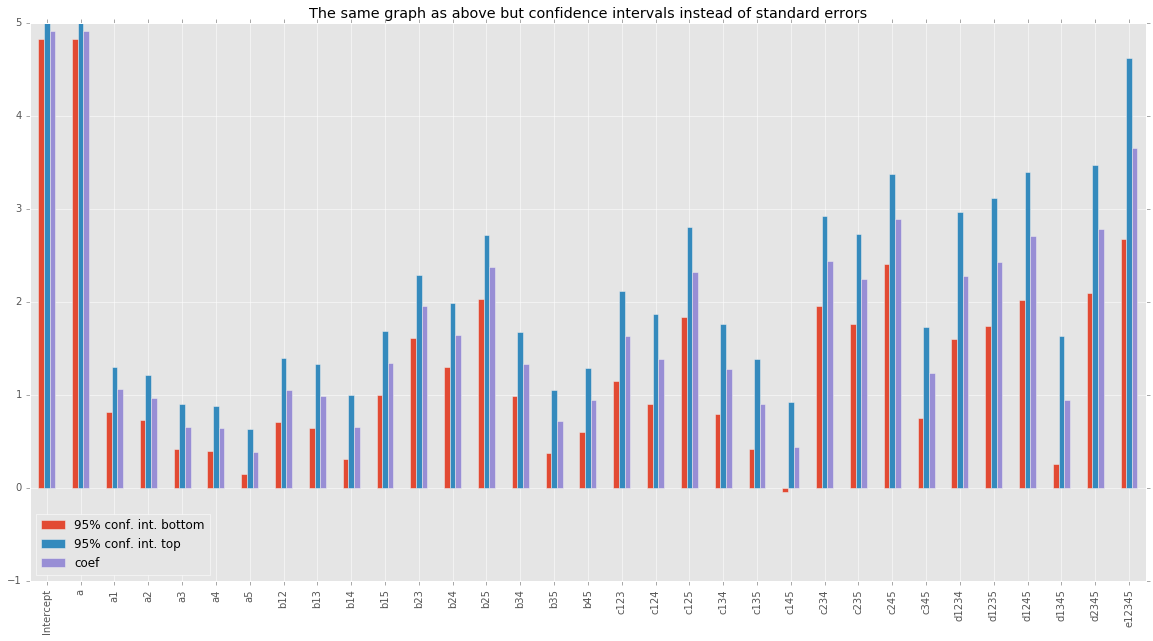

In [14]:
lm_devtime_jitter_60 = smf.ols(formula="development ~ a + a1 + a2 + a3 + a4 + a5 +"
                            "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                            "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                            "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data_jitter_60).fit()
conf_int_devtime_jitter_60 = pd.DataFrame(lm_devtime_jitter_60.conf_int())
conf_int_devtime_jitter_60[2] = [lm_devtime_jitter_60.params.a,
                              lm_devtime_jitter_60.params.a,
                              lm_devtime_jitter_60.params.a1,
                              lm_devtime_jitter_60.params.a2,
                              lm_devtime_jitter_60.params.a3,
                              lm_devtime_jitter_60.params.a4,
                              lm_devtime_jitter_60.params.a5,
                              lm_devtime_jitter_60.params.b12,
                              lm_devtime_jitter_60.params.b13,
                              lm_devtime_jitter_60.params.b14,
                              lm_devtime_jitter_60.params.b15,
                              lm_devtime_jitter_60.params.b23,
                              lm_devtime_jitter_60.params.b24,
                              lm_devtime_jitter_60.params.b25,
                              lm_devtime_jitter_60.params.b34,
                              lm_devtime_jitter_60.params.b35,
                              lm_devtime_jitter_60.params.b45,
                              lm_devtime_jitter_60.params.c123,
                              lm_devtime_jitter_60.params.c124,
                              lm_devtime_jitter_60.params.c125,
                              lm_devtime_jitter_60.params.c134,
                              lm_devtime_jitter_60.params.c135,
                              lm_devtime_jitter_60.params.c145,
                              lm_devtime_jitter_60.params.c234,
                              lm_devtime_jitter_60.params.c235,
                              lm_devtime_jitter_60.params.c245,
                              lm_devtime_jitter_60.params.c345,
                              lm_devtime_jitter_60.params.d1234,
                              lm_devtime_jitter_60.params.d1235,
                              lm_devtime_jitter_60.params.d1245,
                              lm_devtime_jitter_60.params.d1345,
                              lm_devtime_jitter_60.params.d2345,
                              lm_devtime_jitter_60.params.e12345]
conf_int_devtime_jitter_60.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
conf_int_devtime_jitter_60["coef"].plot.bar(yerr=lm_devtime_jitter_60.bse, figsize=(20,10), color="b",
                                         title="Inferred interaction coefficients from jittered dev. time "
                                                "and 3 replicates, with standard errors, %s duplicates" % n)
plt.savefig("dev_time_jitter_%s_duplicates_std_err_as_range.pdf" % n)
conf_int_devtime_jitter_60.plot.bar(figsize=(20,10), title="The same graph as above but confidence intervals "
                                 "instead of standard errors")
plt.savefig("dev_time_jitter_%s_duplicates_conf_int_as_bars.pdf" % n)

- Output summary stats for duplicated and jittered data:

In [15]:
lm_devtime_jitter_60.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            development   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     39.28
Date:                Wed, 03 May 2017   Prob (F-statistic):          6.71e-118
Time:                        17:17:25   Log-Likelihood:                -228.71
No. Observations:                 576   AIC:                             521.4
Df Residuals:                     544   BIC:                             660.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.9075      0.044    112.436      0.000         4.822     4.993
a              4.9075      0.044    112.436      0.000         4.822     4.993
a1             1.0566      0.123      8.558      0.000         0.814     1.299
a2             0.9680      0.123      7.841      0.000         0.726     1.211
a3             0.6560      0.123      5.314      0.000         0.413     0.898
a4             0.6381      0.123      5.169      0.000         0.396     0.881
a5             0.3886      0.123      3.148      0.002         0.146     0.631
b12            1.0496      0.175      6.012      0.000         0.707     1.393
b13            0.9867      0.175      5.652      0.000         0.644     1.330
b14            0.6518      0.175      3.733      0.000         0.309     0.995
b15            1.3404      0.175      7.677      0.000         0.997     1.683
b23            1.9484      0.175     11.160      0.000         1.605     2.291
b24            1.6456      0.175      9.425      0.000         1.303     1.989
b25            2.3691      0.175     13.569      0.000         2.026     2.712
b34            1.3258      0.175      7.594      0.000         0.983     1.669
b35            0.7118      0.175      4.077      0.000         0.369     1.055
b45            0.9445      0.175      5.410      0.000         0.602     1.287
c123           1.6340      0.247      6.618      0.000         1.149     2.119
c124           1.3860      0.247      5.614      0.000         0.901     1.871
c125           2.3202      0.247      9.397      0.000         1.835     2.805
c134           1.2793      0.247      5.181      0.000         0.794     1.764
c135           0.9017      0.247      3.652      0.000         0.417     1.387
c145           0.4375      0.247      1.772      0.077        -0.047     0.923
c234           2.4360      0.247      9.866      0.000         1.951     2.921
c235           2.2431      0.247      9.085      0.000         1.758     2.728
c245           2.8903      0.247     11.706      0.000         2.405     3.375
c345           1.2378      0.247      5.013      0.000         0.753     1.723
d1234          2.2792      0.349      6.527      0.000         1.593     2.965
d1235          2.4238      0.349      6.942      0.000         1.738     3.110
d1245          2.7086      0.349      7.757      0.000         2.023     3.394
d1345          0.9448      0.349      2.706      0.007         0.259     1.631
d2345          2.7832      0.349      7.971      0.000         2.097     3.469
e12345         3.6472      0.494      7.386      0.000         2.677     4.617
==============================================================================
Omnibus:                        4.702   Durbin-Watson:                   2.909
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.647
Sk

- Compare confidence intervals for three replicates agains jittered data:

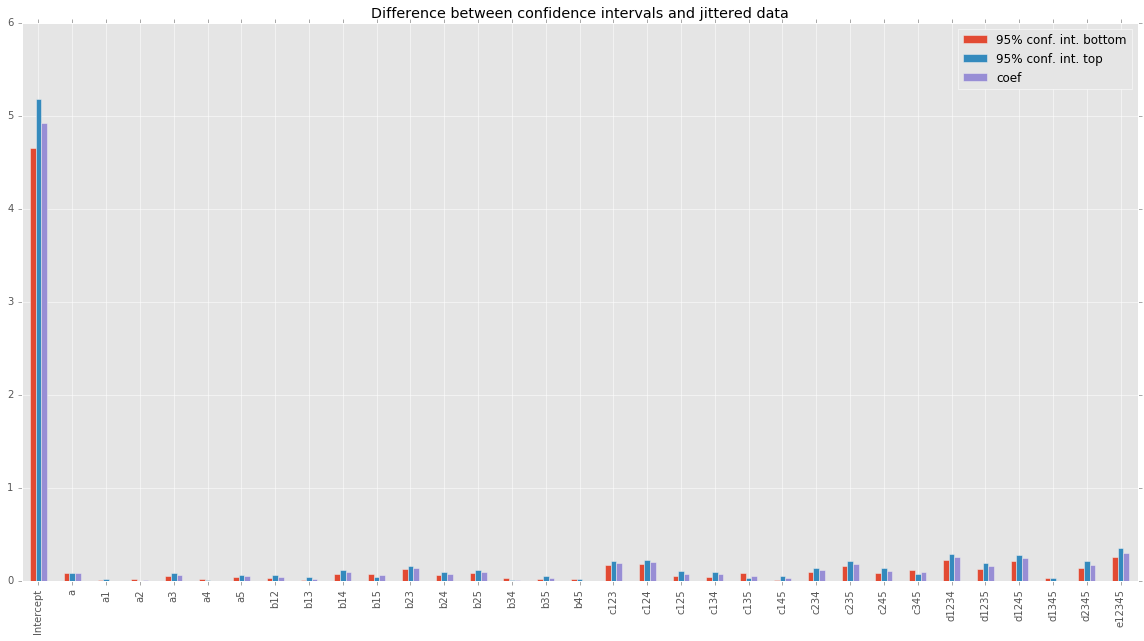

In [16]:
conf_int_devtime_3_reps_difference_jitter = abs(conf_int_devtime_3_reps - conf_int_devtime_jitter)
conf_int_devtime_3_reps_difference_jitter["coef"]["Intercept"] = conf_int_devtime_jitter["coef"]["Intercept"]
conf_int_devtime_3_reps_difference_jitter["95% conf. int. top"]["Intercept"] = conf_int_devtime_jitter["95% conf. int. top"]["Intercept"]
conf_int_devtime_3_reps_difference_jitter["95% conf. int. bottom"]["Intercept"] = conf_int_devtime_jitter["95% conf. int. bottom"]["Intercept"]
conf_int_devtime_3_reps_difference_jitter.plot.bar(figsize=(20,10), title="Difference between confidence intervals "
                                                   "and jittered data")
plt.savefig("dev_time_differences_jitter_conf_int_as_bars.pdf")

- Plot parameters inferred from fecundity:

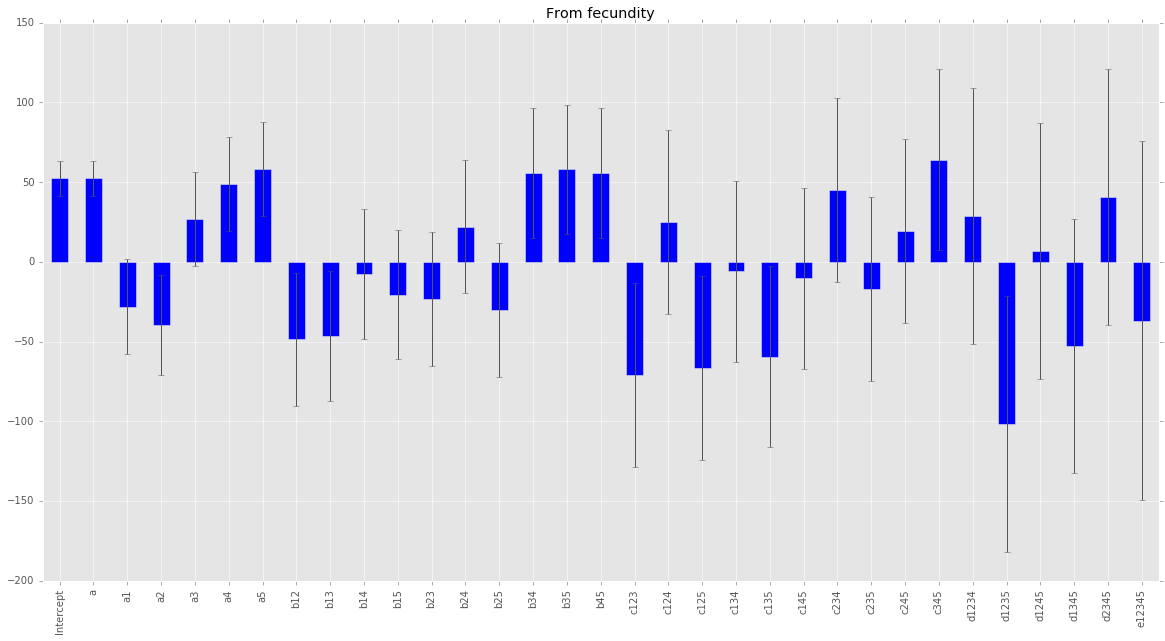

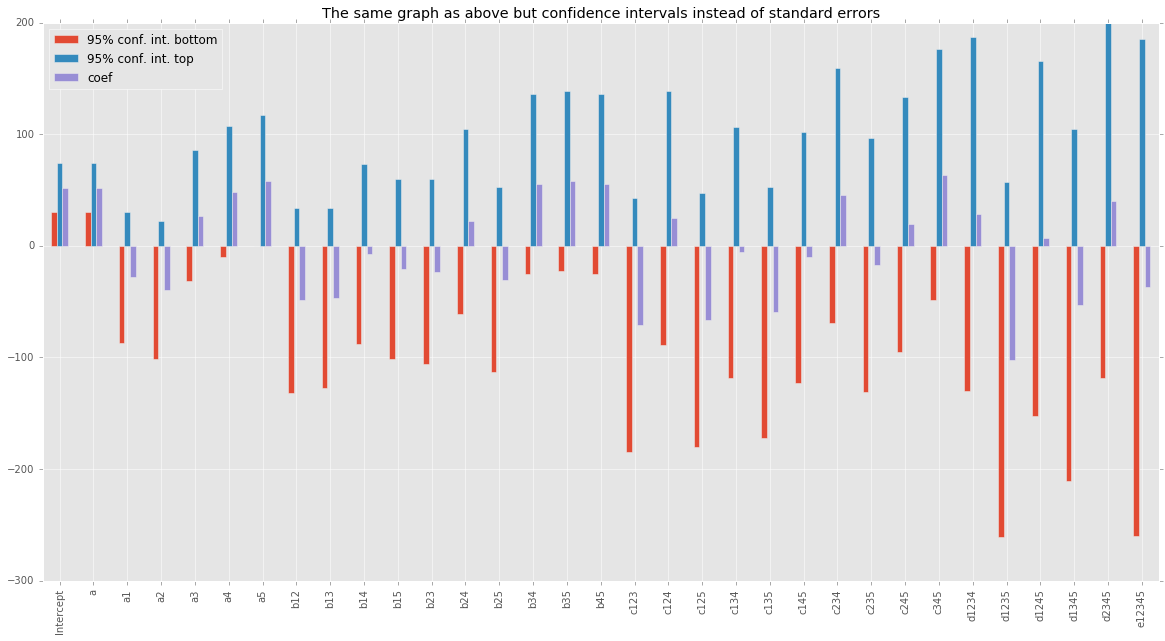

In [17]:
conf_int_fecundity = pd.DataFrame(lm_fecundity.conf_int())
conf_int_fecundity[2] = [lm_fecundity.params.a,
                       lm_fecundity.params.a,
                       lm_fecundity.params.a1,
                       lm_fecundity.params.a2,
                       lm_fecundity.params.a3,
                       lm_fecundity.params.a4,
                       lm_fecundity.params.a5,
                       lm_fecundity.params.b12,
                       lm_fecundity.params.b13,
                       lm_fecundity.params.b14,
                       lm_fecundity.params.b15,
                       lm_fecundity.params.b23,
                       lm_fecundity.params.b24,
                       lm_fecundity.params.b25,
                       lm_fecundity.params.b34,
                       lm_fecundity.params.b35,
                       lm_fecundity.params.b45,
                       lm_fecundity.params.c123,
                       lm_fecundity.params.c124,
                       lm_fecundity.params.c125,
                       lm_fecundity.params.c134,
                       lm_fecundity.params.c135,
                       lm_fecundity.params.c145,
                       lm_fecundity.params.c234,
                       lm_fecundity.params.c235,
                       lm_fecundity.params.c245,
                       lm_fecundity.params.c345,
                       lm_fecundity.params.d1234,
                       lm_fecundity.params.d1235,
                       lm_fecundity.params.d1245,
                       lm_fecundity.params.d1345,
                       lm_fecundity.params.d2345,
                       lm_fecundity.params.e12345]
conf_int_fecundity.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
conf_int_fecundity["coef"].plot.bar(yerr=lm_fecundity.bse, figsize=(20,10), color="b",
                                  title="From fecundity")
plt.savefig("fecundity_std_err_as_range.pdf")
conf_int_fecundity.plot.bar(figsize=(20,10), title="The same graph as above but confidence intervals "
                                 "instead of standard errors")
plt.savefig("fecundity_conf_int_as_bars.pdf")